In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve

In [2]:
# Carregando os dados de treinamento
train_data = pd.read_csv('./data//train.csv')
test_data = pd.read_csv('./data//test.csv')

## Análise exploratória de dados

- Informações sobre o conjunto de dados

In [3]:
# Visualizando as 5 primeiras linhas do dataframe
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Remoção da coluna 'Id'
train_data = train_data.drop('Id', axis=1)

In [5]:
# Informações gerais sobre as colunas e os tipos de dados
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
# Quantidade de valores ausentes
missing = train_data.isnull().sum()
missing

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [7]:
# Resumo estatístico dos atributos e Target (SalePrice)
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Função para plotar histograma de média do preço de venda por uma determinada variável categórica
def plot_mean_price(data, column):
    media_preco = data.groupby(column)['SalePrice'].mean().sort_values()
    plt.bar(media_preco.index, media_preco.values)
    plt.xlabel(column)
    plt.ylabel('Média do Preço de Venda')
    plt.title(f'Histograma da Média do Preço de Venda por {column}')
    plt.xticks(rotation=45)
    plt.show()

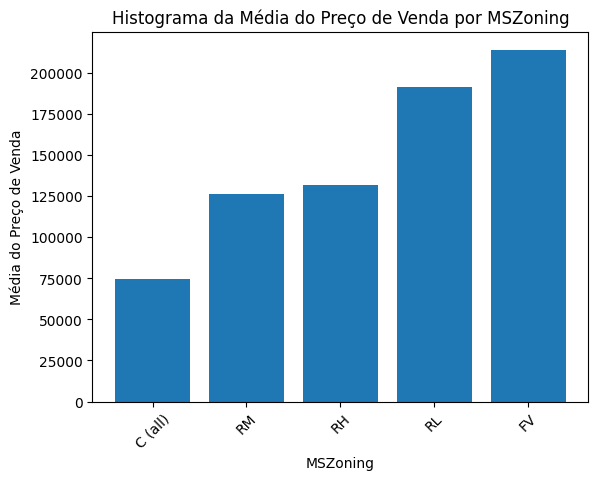

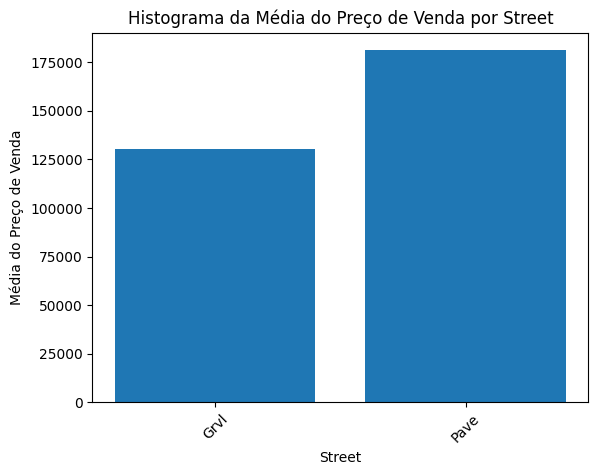

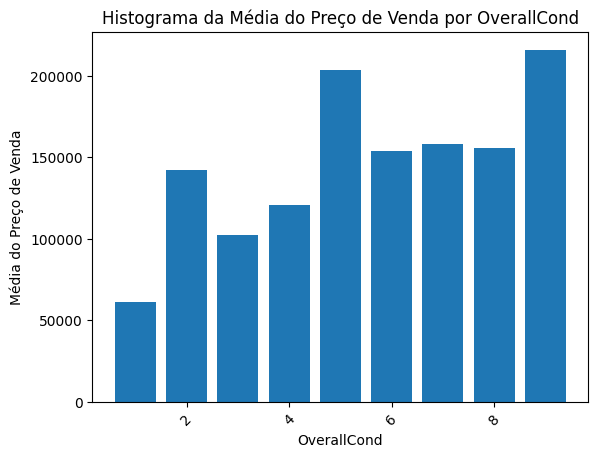

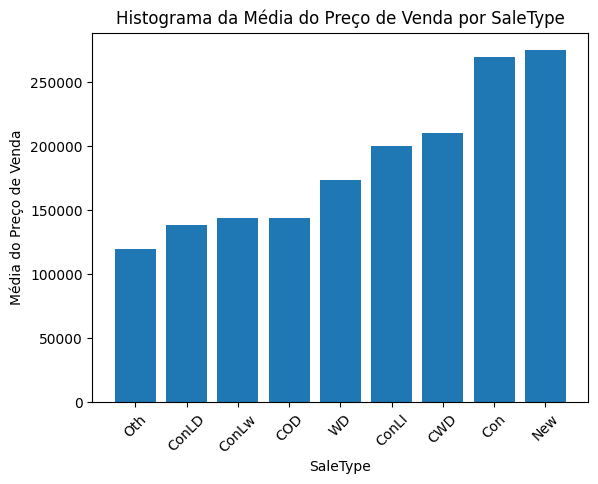

In [9]:
# Plotar histograma da média do preço de venda por Zona
plot_mean_price(train_data, 'MSZoning')

# Plotar histograma da média do preço de venda por Tipo de Rua
plot_mean_price(train_data, 'Street')

# Plotar histograma da média do preço de venda por Condição da Casa
plot_mean_price(train_data, 'OverallCond')

# Plotar histograma da média do preço de venda por Tipos de Venda
plot_mean_price(train_data, 'SaleType')

In [10]:
# Quantidade de valores ausentes no DataFrame train_data
train_data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

## Feature Engineering

In [11]:
# Codificando as variáveis categóricas usando LabelEncoder e visualizando as 5 primeiras linhas
df_object = train_data.select_dtypes(include='object')
le = LabelEncoder()
df_object_encoded = df_object.apply(le.fit_transform)

df_object_encoded.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,3,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
1,3,1,2,3,3,0,2,0,24,1,...,1,1,4,4,2,3,4,4,8,4
2,3,1,2,0,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
3,3,1,2,0,3,0,0,0,6,2,...,5,2,4,4,2,3,4,4,8,0
4,3,1,2,0,3,0,2,0,15,2,...,1,1,4,4,2,3,4,4,8,4


array([[<Axes: title={'center': 'MSZoning'}>,
        <Axes: title={'center': 'Street'}>,
        <Axes: title={'center': 'Alley'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandContour'}>,
        <Axes: title={'center': 'Utilities'}>,
        <Axes: title={'center': 'LotConfig'}>],
       [<Axes: title={'center': 'LandSlope'}>,
        <Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'Condition1'}>,
        <Axes: title={'center': 'Condition2'}>,
        <Axes: title={'center': 'BldgType'}>,
        <Axes: title={'center': 'HouseStyle'}>,
        <Axes: title={'center': 'RoofStyle'}>],
       [<Axes: title={'center': 'RoofMatl'}>,
        <Axes: title={'center': 'Exterior1st'}>,
        <Axes: title={'center': 'Exterior2nd'}>,
        <Axes: title={'center': 'MasVnrType'}>,
        <Axes: title={'center': 'ExterQual'}>,
        <Axes: title={'center': 'ExterCond'}>,
        <Axes: title={'center': 'Foundation'}>],
       

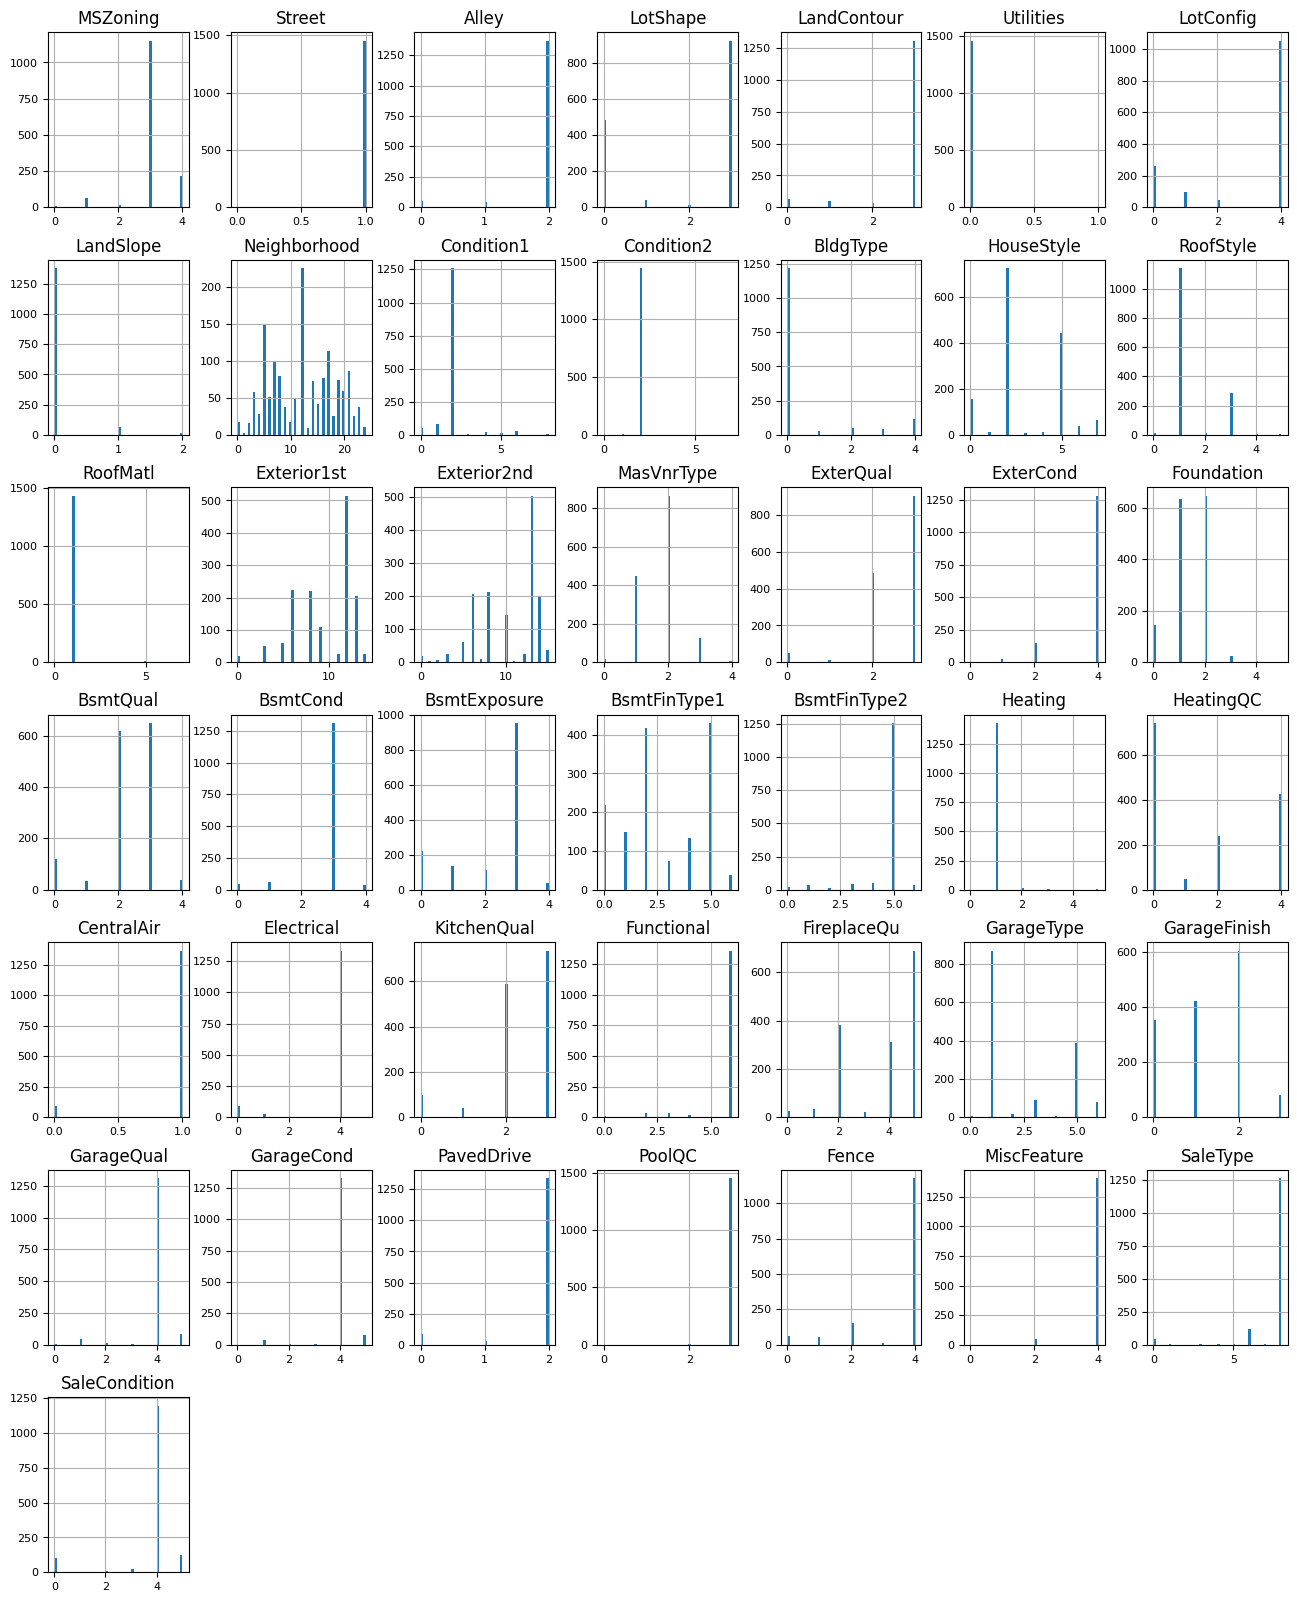

In [12]:
df_object_encoded.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [13]:
df_num = train_data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

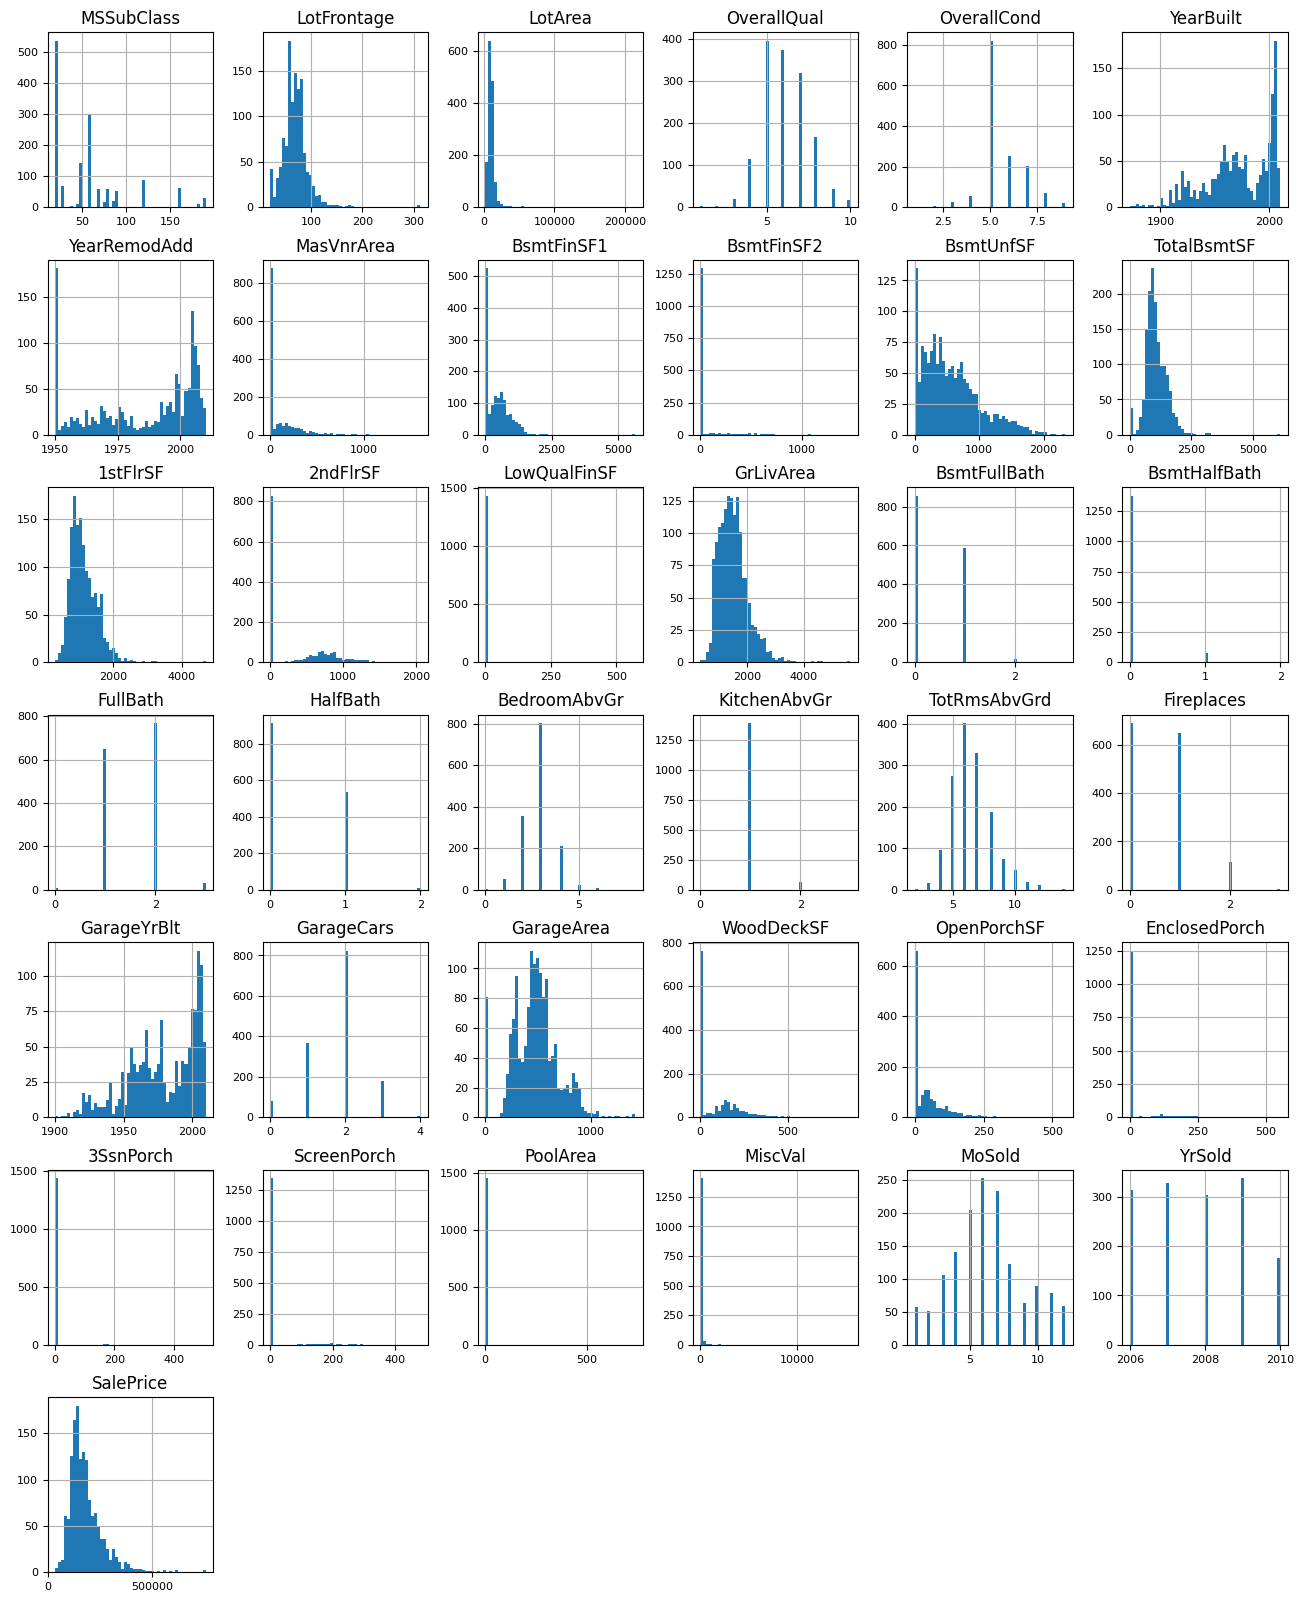

In [14]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [15]:
# Selecionando um conjunto de atributos relevantes do DataFrame train_data e criando um novo DataFrame contendo apenas esses atributos.
atributos_relevantes = ['MSZoning', 'LotArea', 'Street', 'HouseStyle', 'OverallQual', 'HeatingQC', 'LotConfig', 'ExterQual', 
                        'ExterCond', 'Foundation', 'TotRmsAbvGrd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 
                        'PoolQC', 'SalePrice']
df_relevantes = train_data[atributos_relevantes].copy()
df_relevantes

,MSZoning,LotArea,Street,HouseStyle,OverallQual,HeatingQC,LotConfig,ExterQual,ExterCond,Foundation,TotRmsAbvGrd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,PoolQC,SalePrice
0,RL,8450,Pave,2Story,7,Ex,Inside,Gd,TA,PConc,8,1,0,2,1,1,NaN,208500
1,RL,9600,Pave,1Story,6,Ex,FR2,TA,TA,CBlock,6,0,1,2,0,1,NaN,181500
2,RL,11250,Pave,2Story,7,Ex,Inside,Gd,TA,PConc,6,1,0,2,1,1,NaN,223500
3,RL,9550,Pave,2Story,7,Gd,Corner,TA,TA,BrkTil,7,1,0,1,0,1,NaN,140000
4,RL,14260,Pave,2Story,8,Ex,FR2,Gd,TA,PConc,9,1,0,2,1,1,NaN,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,7917,Pave,2Story,6,Ex,Inside,TA,TA,PConc,7,0,0,2,1,1,NaN,175000
1456,RL,13175,Pave,1Story,6,TA,Inside,TA,TA,CBlock,7,1,0,2,0,1,NaN,210000
1457,RL,9042,Pave,2Story,7,Ex,Inside,Ex,Gd,Stone,9,0,0,2,0,1,NaN,266500
1458,RL,9717,Pave,1Story,5,Gd,Inside,TA,TA,CBlock,5,1,0,1,0,1,NaN,142125


In [16]:
# Aplicação do LabelEncoder nos atributos categóricos
le = LabelEncoder()
df_relevantes['MSZoning'] = le.fit_transform(df_relevantes['MSZoning'])
df_relevantes['Street'] = le.fit_transform(df_relevantes['Street'])
df_relevantes['HouseStyle'] = le.fit_transform(df_relevantes['HouseStyle'])
df_relevantes['HeatingQC'] = le.fit_transform(df_relevantes['HeatingQC'])
df_relevantes['LotConfig'] = le.fit_transform(df_relevantes['LotConfig'])
df_relevantes['ExterCond'] = le.fit_transform(df_relevantes['ExterCond'])
df_relevantes['ExterQual'] = le.fit_transform(df_relevantes['ExterQual'])
df_relevantes['Foundation'] = le.fit_transform(df_relevantes['Foundation'])
df_relevantes['PoolQC'] = le.fit_transform(df_relevantes['PoolQC'])

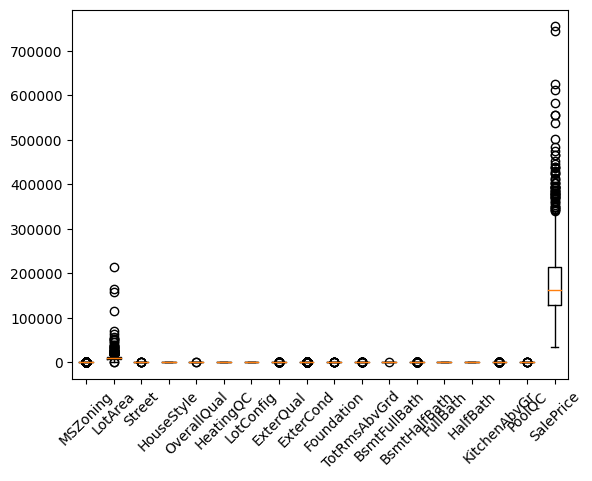

In [17]:
# Criação de um gráfico de boxplot para visualizar a distribuição dos dados no DataFrame df_relevantes
fig, ax = plt.subplots()
ax.boxplot(df_relevantes.values)
ax.set_xticklabels(df_relevantes.columns, rotation=45)
plt.show()

In [18]:
# Identificação dos outliers usando o método do intervalo interquartil (IQR)
Q1 = df_relevantes.quantile(0.25)
Q3 = df_relevantes.quantile(0.75)
IQR = Q3 - Q1

# Definição dos limites superior e inferior
limite_inferior = Q1 - 1 * IQR
limite_superior = Q3 + 1 * IQR

# Remoção dos outliers
df_sem_outliers = df_relevantes[~((df_relevantes < limite_inferior) | (df_relevantes > limite_superior)).any(axis=1)]

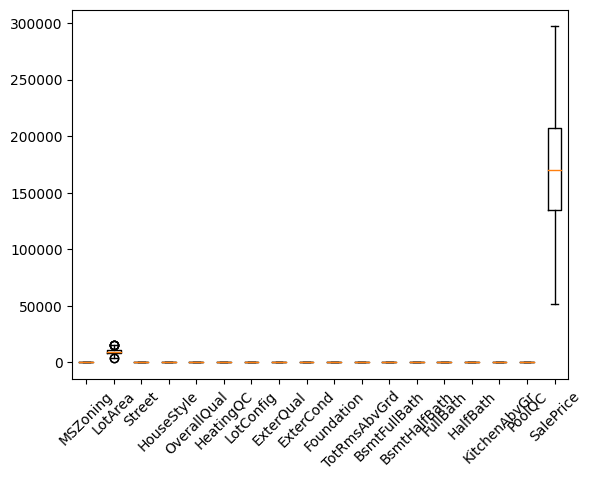

In [19]:
fig, ax = plt.subplots()
ax.boxplot(df_sem_outliers.values)
ax.set_xticklabels(df_sem_outliers.columns, rotation=45)
plt.show()

## Aprendizagem supervisionada

- Modelo de Regressão Linear múltipla

In [20]:
# Definindo as variáveis independentes (X) e dependentes (y)
X = df_sem_outliers.drop('SalePrice', axis=1).copy()
y = df_sem_outliers['SalePrice']

In [21]:
# Criando e ajustando o modelo
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [22]:
# Definindo os coeficientes a e b
a = model.coef_
b = model.intercept_
print('Coeficiente angular: ', a)
print('Coeficiente linear: ', b)

Coeficiente angular:  [ 0.00000000e+00  3.25598383e+00 -3.63797881e-12 -1.74906636e+03
  2.15192264e+04 -8.03233387e+02 -2.77915193e+02 -1.15888814e+04
  1.81898940e-12  6.07390805e+03  6.35509651e+03  1.56603263e+04
  0.00000000e+00  1.46572167e+04  6.62329687e+03  0.00000000e+00
  0.00000000e+00]
Coeficiente linear:  -31594.167387664435


In [23]:
# Previsões do modelo para os dados de treinamento
y_pred_train = model.predict(X)

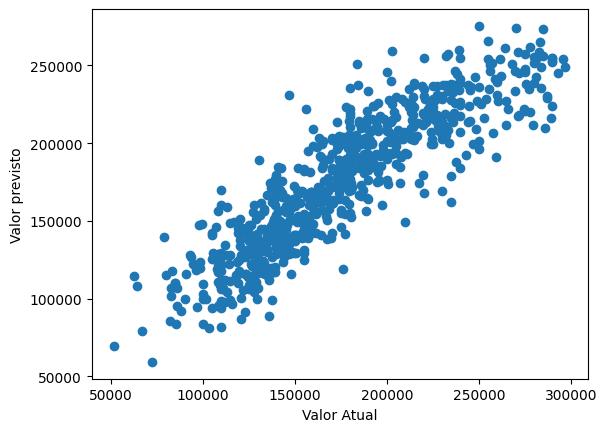

In [24]:
plt.scatter(y, y_pred_train)
plt.xlabel("Valor Atual")
plt.ylabel("Valor previsto")
plt.show()

- - Avaliação de desempenho

In [25]:
# Cálculo e impressão do RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred_train))
print(f"RMSE: {rmse:.2f}")

RMSE: 22996.60


Root Mean Squared Error indica a raiz quadrada do erro médio quadrático das previsões.

Essa métrica mede a diferença média entre os valores previstos e os valores reais dos dados.

O RMSE fornece uma medida da dispersão dos resíduos e indica o quanto o modelo se desvia, em média, dos valores reais.

Quanto menor o valor do RMSE, melhor é o ajuste do modelo aos dados.

Com o RMSE em 22996.60, interpretamos que essa diferença representa a precisão média do modelo nas previsões do "Valor previsto" com base no "Valor Atual".

In [26]:
# Cálculo e impressão do RSE
rse = mean_squared_error(y, y_pred_train, squared=True)
print(f"RSE: {rse:.2f}")

RSE: 528843412.71


Residual Standart Error indica a raiz quadrada do erro médio quadrático dos resíduos da regressão.

O RSE é uma métrica semelhante ao RMSE e também mede a dispersão dos resíduos do modelo.

Quanto menor o valor do RSE, melhor é o ajuste do modelo aos dados.

Com o RSE em 528843412.71, interpretamos que os resíduos do modelo de regressão estão desviando em torno de 528843412.71 no "Valor previsto".

In [27]:
# cálculo e impressão do MAE
mae = mean_absolute_error(y, y_pred_train)
print(f"MAE: {mae:.2f}")

MAE: 17628.95


Mean Absolut Error indica média dos valores absolutos dos erros (resíduos)

O MAE é uma métrica que mede a média da diferença absoluta entre os valores previstos e os valores reais. 

Quanto menor o valor do MAE, melhor é o ajuste do modelo aos dados.

Com o MAE em 17628.95, interpretamos que o erro médio absoluto das previsões do modelo é em torno de 17628.95 no "Valor previsto".

In [28]:
# Cálculo e impressão do R2
r2 = r2_score(y, y_pred_train)
print(f"R2: {r2:.2f}")

R2: 0.79


R-squared, conhecido também como coeficiente de determinação, indica a proporção da soma dos quadrados dos resíduos dividida pela soma dos quadrados totais

O valor varia entre 0 e 1, sendo que 0 indica que o modelo não explica nenhuma variabilidade e 1 indica que o modelo explica toda a variabilidade.

Quanto mais próximo de 1 o valor for, melhor é o ajuste do modelo aos dados.

Com o R2 em 0.79, interpretamos que o modelo explica em torno de 79% da variação do "Valor previsto" com base no "Valor Atual".

- Modelo de Classificação Regressão Logística

In [29]:
atributos_relevantes.remove('SalePrice')
test_relevantes = test_data[atributos_relevantes].copy()
test_relevantes

,MSZoning,LotArea,Street,HouseStyle,OverallQual,HeatingQC,LotConfig,ExterQual,ExterCond,Foundation,TotRmsAbvGrd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,PoolQC
0,RH,11622,Pave,1Story,5,TA,Inside,TA,TA,CBlock,5,0.0,0.0,1,0,1,NaN
1,RL,14267,Pave,1Story,6,TA,Corner,TA,TA,CBlock,6,0.0,0.0,1,1,1,NaN
2,RL,13830,Pave,2Story,5,Gd,Inside,TA,TA,PConc,6,0.0,0.0,2,1,1,NaN
3,RL,9978,Pave,2Story,6,Ex,Inside,TA,TA,PConc,7,0.0,0.0,2,1,1,NaN
4,RL,5005,Pave,1Story,8,Ex,Inside,Gd,TA,PConc,5,0.0,0.0,2,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,1936,Pave,2Story,4,Gd,Inside,TA,TA,CBlock,5,0.0,0.0,1,1,1,NaN
1455,RM,1894,Pave,2Story,4,TA,Inside,TA,TA,CBlock,6,0.0,0.0,1,1,1,NaN
1456,RL,20000,Pave,1Story,5,Ex,Inside,TA,TA,CBlock,7,1.0,0.0,1,0,1,NaN
1457,RL,10441,Pave,SFoyer,5,TA,Inside,TA,TA,PConc,6,0.0,1.0,1,0,1,NaN


In [30]:
# Aplicação do LabelEncoder nos atributos categóricos
le = LabelEncoder()
test_relevantes['MSZoning'] = le.fit_transform(test_relevantes['MSZoning'])
test_relevantes['Street'] = le.fit_transform(test_relevantes['Street'])
test_relevantes['HouseStyle'] = le.fit_transform(test_relevantes['HouseStyle'])
test_relevantes['HeatingQC'] = le.fit_transform(test_relevantes['HeatingQC'])
test_relevantes['LotConfig'] = le.fit_transform(test_relevantes['LotConfig'])
test_relevantes['ExterCond'] = le.fit_transform(test_relevantes['ExterCond'])
test_relevantes['ExterQual'] = le.fit_transform(test_relevantes['ExterQual'])
test_relevantes['Foundation'] = le.fit_transform(test_relevantes['Foundation'])
test_relevantes['PoolQC'] = le.fit_transform(test_relevantes['PoolQC'])

In [31]:
# Quantidade de valores ausentes
test_relevantes.isnull().sum()

MSZoning        0
LotArea         0
Street          0
HouseStyle      0
OverallQual     0
HeatingQC       0
LotConfig       0
ExterQual       0
ExterCond       0
Foundation      0
TotRmsAbvGrd    0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
KitchenAbvGr    0
PoolQC          0
dtype: int64

In [32]:
# Preenchendo os valores ausentes com 0
test_relevantes.fillna(0, inplace=True)
test_relevantes.isnull().sum()

MSZoning        0
LotArea         0
Street          0
HouseStyle      0
OverallQual     0
HeatingQC       0
LotConfig       0
ExterQual       0
ExterCond       0
Foundation      0
TotRmsAbvGrd    0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
KitchenAbvGr    0
PoolQC          0
dtype: int64

In [33]:
# Realizando a predição dos SalePrice do conjunto de testes
y_pred_test = model.predict(test_relevantes)

In [34]:
# Preenchendo criando e preenchendo a coluna SalePrice do dataframe de testes
test_relevantes['SalePrice'] = y_pred_test

In [35]:
# Criando a classificação de preços baratos ou caros usando a média como ponto de separação
media = test_relevantes['SalePrice'].mean()

test_relevantes['Barato'] = test_relevantes['SalePrice'].apply(lambda x: 1 if x < media else 0)

In [36]:
# Definindo o Target e separando os dados de Treinamento e Teste
data = test_relevantes.drop('Barato', axis=1).copy()
target = test_relevantes['Barato']
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [37]:
# Criação, treino e previsões com o conjunto de dados de teste
model = LogisticRegression( max_iter=10000, random_state=42)
model.fit(data_train, target_train)
target_pred = model.predict(data_test)

In [38]:
# Matriz de confusão
matrix_conf = confusion_matrix(target_test, target_pred)
print("Matriz de Confusão\n", matrix_conf)

Matriz de Confusão
 [[175  22]
 [ 18 223]]


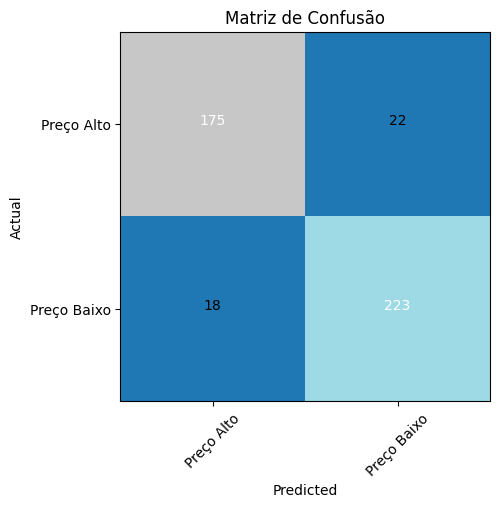

In [39]:
# Plotando a matriz de confusão
labels = ['Preço Alto', 'Preço Baixo']

plt.imshow(matrix_conf, interpolation='nearest', cmap=plt.cm.tab20)
plt.title('Matriz de Confusão')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
thresh = matrix_conf.max() / 2.
for i in range(matrix_conf.shape[0]):
    for j in range(matrix_conf.shape[1]):
        plt.text(j, i, format(matrix_conf[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if matrix_conf[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')

# Exibir o gráfico
plt.show()

A matriz de confusão é um informativo de desempenho do modelo em um conjunto de 
dados de testes.

Foram apresentadas 175 amostras classificadas corretamente como preço alto, 22 
amostras classificadas incorretamente como preço baixo, 223 amostras 
classificadas corretamente como preço baixo e 18 amostras classificadas 
incorretamente como preço alto.

- - Métricas de avaliação

In [40]:
# Acurácia
print("Acurácia Regressão Logística:", accuracy_score(target_test, target_pred))

Acurácia Regressão Logística: 0.908675799086758


A Acurácia/Accuracy apresenta uma performance geral do modelo, apontando quantas classificações foram feitas corretamente ou incorretamente. É a proporção de de previsões verdadeiras em relação ao todo. Entretanto, caso os dados estejam desequilibrados esta métrica pode apresentar resultados não confiáveis.

Com a acurácia em 0.90, entende-se que o modelo classificou corretamente 90% das
amostras em relação ao todo.

In [41]:
# Precisão
print("Precisão Regressão Logística:", precision_score(target_test, target_pred, average='weighted'))

Precisão Regressão Logística: 0.9086441248371022


A Precisão/Precision apresenta uma perfomance dentre as classificações da classe Positivo, ou seja, apresenta a quantidade de classificações feitas corretamente apenas com base nos exemplos previstos como positivos. Útil para evitar classificar incorretamente exemplos  negativos como positivos.

Com a precisão em 0.90, indica que 90% das amostras classificadas como positivas 
pelo modelo são realmente positivas.

In [42]:
# Revocação
print("Revocação Regressão Logística:", recall_score(target_test, target_pred, average='weighted'))

Revocação Regressão Logística: 0.908675799086758


A Revocação/Recall apresenta a proporção de exemplos positivos previstos corretamente em relação ao total de exemplos reais positivos. Útil para evitar de deixar de classificar exemplos positivos como positivos.

Com a revocação em 0.90, significa que o modelo identificou corretamente 90% das 
amostras positivas em relação ao total de amostras positivas reais

In [43]:
# Medida F1-score
print("Medida F1_score Regressão Logística:", f1_score(target_test, target_pred, average='weighted'))

Medida F1_score Regressão Logística: 0.90858328960815


O F1-score é uma combinação da Precisão e revocação de maneira equilibrada que fornece uma medida geral de equilibrio entre as métricas.

Um valor de 0.90 indica um bom equilíbrio entre a capacidade do modelo de classificar 
corretamente as amostras positivas e a capacidade de detectar corretamente os casos 
positivos.

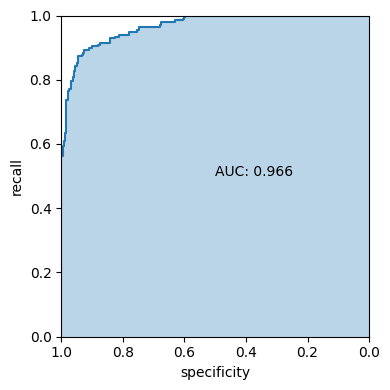

In [44]:
fpr, tpr, thresholds = roc_curve(target_test, model.predict_proba(data_test)[:, 0], pos_label=0)
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.text(0.5, 0.5, f'AUC: {np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)):.3f}')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

O AUC-ROC representa a área sob a curva ROC. A curva ROC fornece uma medida de verdadeiros positivos em relação a taxa de falsos positivos para diferentes limiares declassificação.

Com o valor de 0.966, a métrica sugere que o modelo tem uma excelente performance, tendo uma ótima capacidade de discriminar e classificar corretamente as classes positivas e negativas.

## Aprendizagem não supervisionada

- Clusterização

In [45]:
#Clusterização usando K-means

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(df_sem_outliers)

cluster_labels = kmeans.labels_

df_sem_outliers['Cluster'] = cluster_labels

c:\Users\luizg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\luizg\AppData\Local\Temp\ipykernel_69332\2881200398.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outliers['Cluster'] = cluster_labels


O K-means é um algoritmo de clusterização muito utilizado em aprendizado não supervisionado com o objetivo de agrupar os dados em k grupos distintos.

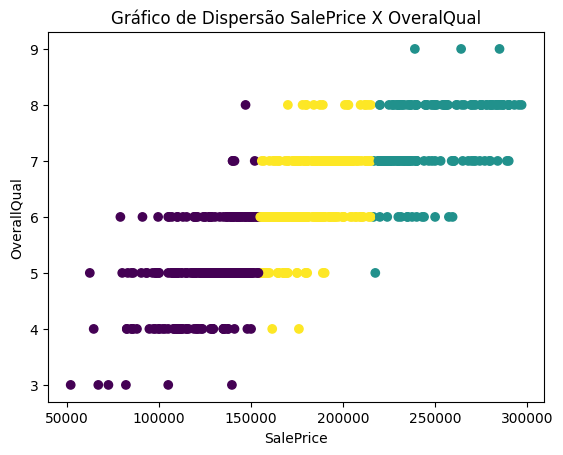

In [46]:
plt.scatter(df_sem_outliers['SalePrice'], df_sem_outliers['OverallQual'], c=df_sem_outliers['Cluster'])
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')
plt.title('Gráfico de Dispersão SalePrice X OveralQual')
plt.show()

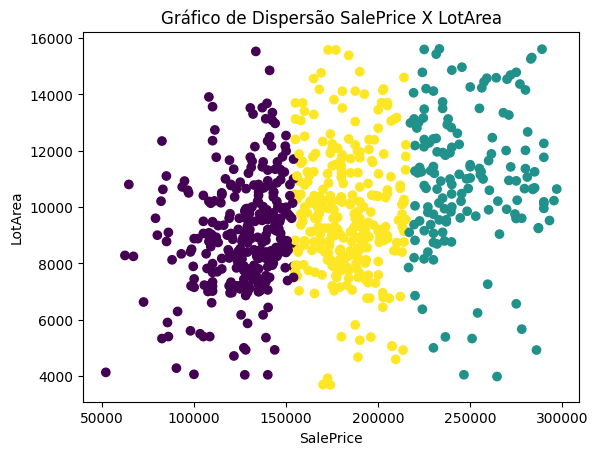

In [47]:
plt.scatter(df_sem_outliers['SalePrice'], df_sem_outliers['LotArea'], c=df_sem_outliers['Cluster'])
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.title('Gráfico de Dispersão SalePrice X LotArea')
plt.show()

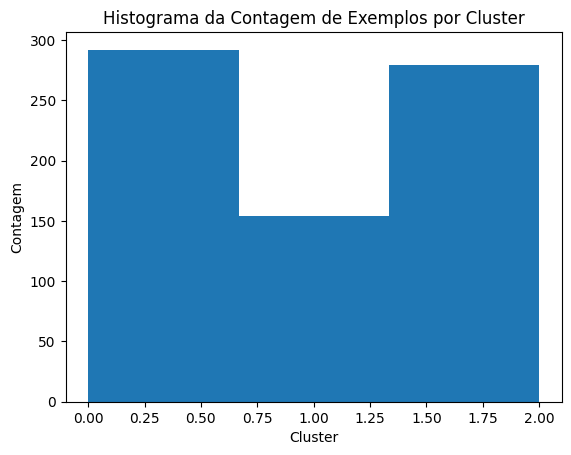

In [48]:
# Histograma da contagem de exemplos por cluster
plt.hist(df_sem_outliers['Cluster'], bins=3)
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.title('Histograma da Contagem de Exemplos por Cluster')
plt.show()

- Redução de Dimensionalidade

Variância explicada por cada componente principal: [0.99403834 0.00596166]


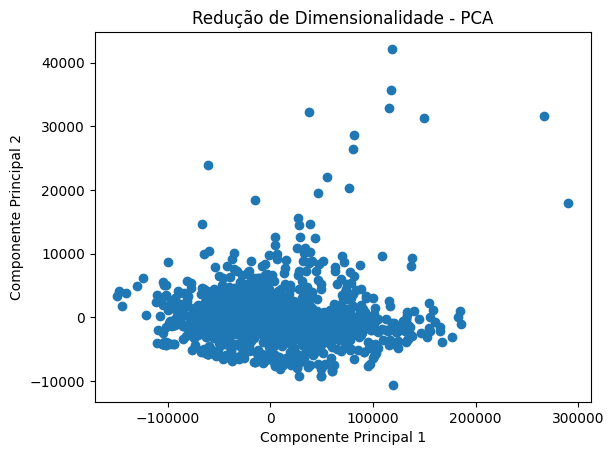

In [49]:
# Redução de dimensionalidade
data = test_relevantes
numeric_data = data.select_dtypes(include=['int64', 'float64'])
numeric_data = numeric_data.dropna()
n_components = 2  # número de componentes principais desejado
pca = PCA(n_components=n_components)
pca.fit(numeric_data)
transformed_data = pca.transform(numeric_data)
explained_variance = pca.explained_variance_ratio_
print("Variância explicada por cada componente principal:", explained_variance)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Redução de Dimensionalidade - PCA')
plt.show()

O Principal Component Analysis é uma técnica de redução de dimensionalidade que busca identificar os componentes principais de um conjunto de dados. Esses componentes principais são utilizados para projetar os dados em um espaço de menor dimensionalidade, sem perda significativa de informação.

- Análise de Associação

In [50]:
# Análise de associação
transactions = []
for _, row in df_sem_outliers.iterrows():
    transactions.append(row.dropna().values.tolist())

te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

frequent_items = apriori(df_encoded, min_support=0.06, use_colnames=True)

associacao = association_rules(frequent_items, metric="lift", min_threshold=1)

print(associacao)

     antecedents            consequents  antecedent support  \
0            (0)                    (1)            1.000000   
1            (1)                    (0)            1.000000   
2            (0)                    (2)            1.000000   
3            (2)                    (0)            0.936552   
4            (0)                    (3)            1.000000   
...          ...                    ...                 ...   
5789         (2)  (0, 1, 3, 4, 5, 7, 8)            0.936552   
5790         (3)  (0, 1, 2, 4, 5, 7, 8)            1.000000   
5791         (4)  (0, 1, 2, 3, 5, 7, 8)            1.000000   
5792         (7)  (0, 1, 2, 3, 4, 5, 8)            0.459310   
5793         (8)  (0, 1, 2, 3, 4, 5, 7)            0.228966   

      consequent support   support  confidence      lift  leverage  \
0               1.000000  1.000000    1.000000  1.000000  0.000000   
1               1.000000  1.000000    1.000000  1.000000  0.000000   
2               0.936552  0.93655

A análise de associação é uma técnica usada para descobrir associações ou relações entre diferentes variáveis em um conjunto de dados identificando regras que possam explicar a relação entre as variáveis

- Análise de Outlier

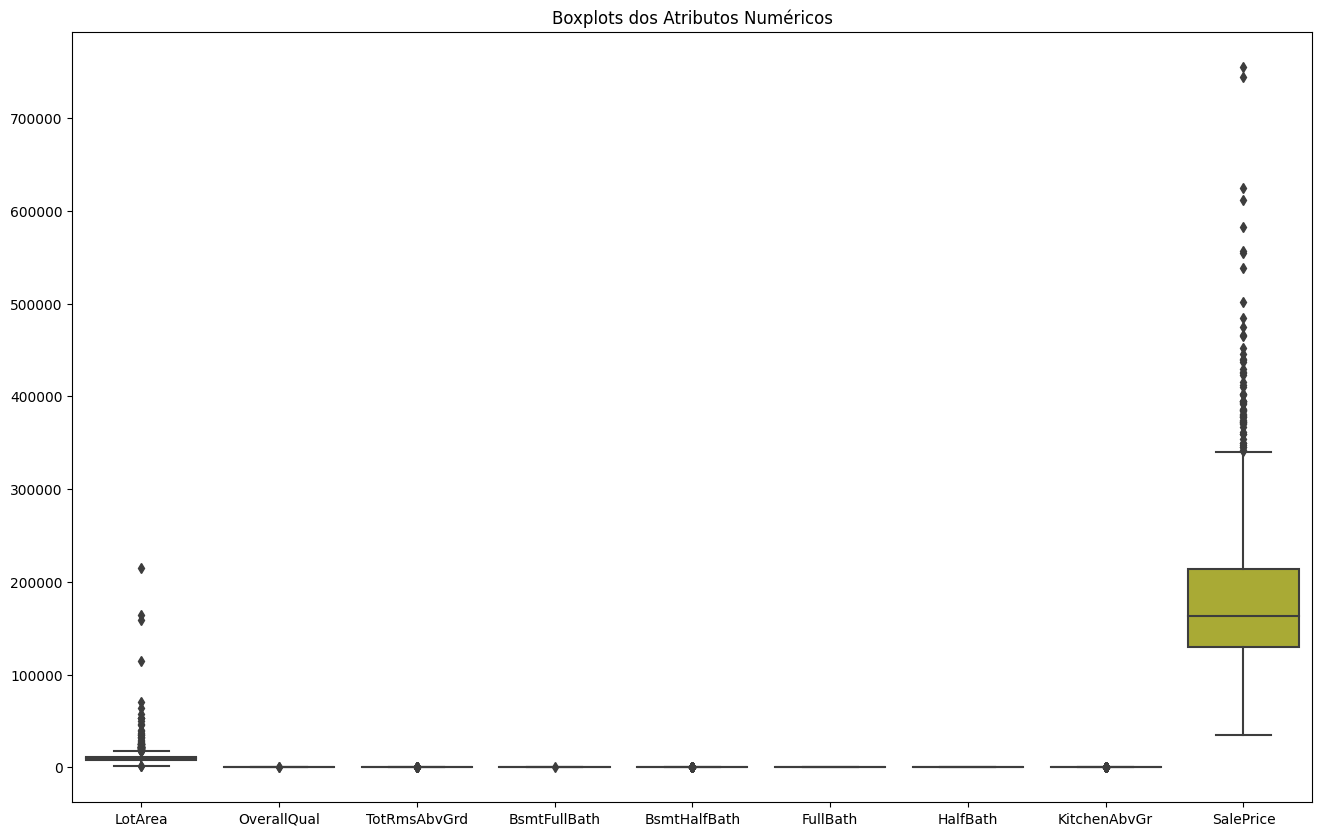

Atributo: LotArea
Número de outliers: 69
Valores dos outliers: [50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095, 46589, 20896, 18450, 21535, 26178, 115149, 21695, 53504, 21384, 28698, 45600, 17920, 25286, 27650, 24090, 25000, 1300, 21286, 1477, 21750, 29959, 18000, 23257, 17755, 35760, 18030, 35133, 32463, 18890, 24682, 23595, 17871, 36500, 63887, 20781, 25339, 57200, 20544, 19690, 21930, 26142]
Atributo: OverallQual
Número de outliers: 2
Valores dos outliers: [1, 1]
Atributo: TotRmsAbvGrd
Número de outliers: 30
Valores dos outliers: [11, 11, 12, 11, 11, 11, 11, 14, 11, 12, 11, 12, 11, 11, 12, 11, 12, 11, 12, 11, 11, 12, 12, 11, 11, 12, 12, 12, 11, 11]
Atributo: BsmtFullBath
Número de outliers: 1
Valores dos outliers: [3]
Atributo: BsmtHalfBath
Número de outliers: 82
Valores dos outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [51]:
# Análise de outlier
df_num = df_relevantes.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(16, 10))
sns.boxplot(data=df_num)
plt.title('Boxplots dos Atributos Numéricos')
plt.show()

outlier_threshold = 1.5

for column in df_num.columns:
    q1 = df_num[column].quantile(0.25)
    q3 = df_num[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - outlier_threshold * iqr
    upper_bound = q3 + outlier_threshold * iqr
    
    outliers = df_num[(df_num[column] < lower_bound) | (df_num[column] > upper_bound)]
    print(f"Atributo: {column}")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Valores dos outliers: {outliers[column].tolist()}")

A análise de outlier é uma técnica utilizada para detectar observações que se desviam significativamente do comportamento esperado em um conjunto de dados. Esses "outliers" podem ser causadas por erros de medição, erros de entrada de dados ou podem ser indicativos de eventos raros ou incomuns.